### Required Libaries
Important libaries

In [ ]:
pip install sklearn-pycrfsuite

     |████████████████████████████████| 485 kB 6.8 MB/s 
  Created wheel for sklearn-pycrfsuite: filename=sklearn_pycrfsuite-0.4.0-py2.py3-none-any.whl size=11002 sha256=2c889c669f5b39c66d1969d93b33aaee1234148b049d566d14a6046129115b16
  Stored in directory: /root/.cache/pip/wheels/44/50/b1/295e502c6652f551dc99bfdb394a3fe2fcb47668e333391f38
  Created wheel for python-crfsuite-extension: filename=python_crfsuite_extension-0.9.7-cp37-cp37m-linux_x86_64.whl size=776674 sha256=6a841c004476bbda1d133f5e115ad047beeec329813d8e45817b2bd877d96ac9
  Stored in directory: /root/.cache/pip/wheels/70/d7/bf/369f4d179407dbf3840132e4135fa61f0bf711f4496d0bf750
Successfully built sklearn-pycrfsuite python-crfsuite-extension


In [ ]:
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk import word_tokenize
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from collections import Counter
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
from nltk.collocations import *
from nltk.util import ngrams
import pycrfsuite
from nltk.book import *
from matplotlib.pyplot import figure
nltk.download('punkt')
nltk.download('stopwords')
import pycrfsuite
from nltk.tag import CRFTagger




[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus

In [ ]:
figure(figsize=(20, 20), dpi=80)#default plot size 

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

In [ ]:
path = '/content/Dudung_Abdurachman_Twitter_collect_data.txt' #file path must be .txt file

###opening document
asumming the text we are feeding in our own document. We can also directly feed text from the internet

we also tokenize the text

In [ ]:
def openandtoken(file_path):
  """Open and tokenizes txt file

  Parameters 
  -----------
  file_path:
        This is file path of the txt document
  Returns
  -----------
  nltk.Text /List 
      This is an nltk.Text type which are a list of tokenized words that can be 
      used for further analysis. Please refer to nltk documentation for further
      information https://www.nltk.org/_modules/nltk/text.html
  
  """
  f = open(file_path, "rb")
  raw = f.read().decode(errors='replace')
  tokens = word_tokenize(raw) #tokenize
  text = nltk.Text(tokens)
  return text

In [ ]:
text = openandtoken(path)

#### Preprocessing
We remove stopwords here. Non alphabetical words are also removed

In [ ]:
## add words to stopwords
stopwords = nltk.corpus.stopwords.words('indonesian')
new_stopwords = ['aku','yg','aja','nya','si','dgn','d','gk','tdk','sih','yg','tp','ya','om','habib','gak','orang','ga','org','dg','lg','bang','semoga','rt','jg','https','hny','krn','pd','sbg','bnyk','dudung','abdurachman','ksad','jenderal','tni','angkatan','darat','pt','kepala','staf','jendral','jd','persero','badan','usaha','milik','negara','perusahaan','erickthohir','bumn','utama']
stopwords.extend(new_stopwords)
#removed_addiems = ['bangga','daerah','konflik','bertugas','addiems','keberaniannya','selamat']
#stopwords.extend(removed_addiems)


In [ ]:
def stopwords_cleaner(text):
  """Use this to clean text. Please define list of stopwords first. 
  You can use nltk.corpus.stopwords.words('language of interest') or refer to NLTK for list.

  Parameters 
  -----------
  text : nltk.Text.text / list
        This is a list of tokenized words
  Returns
  -----------
  cleaned tokens : A list that has removed tokens that are in the list of stopwords and non alphabetical words


  """
  cleaned_tokens = [w for w in text if w.lower() not in stopwords and w.isalpha()] # converts all the words to lower case and before checking if they are in list of stopwords and also removes non alphabetical tokens
  return cleaned_tokens


In [ ]:
clean_text = stopwords_cleaner(text)

#### Frequency distribution
A frequency distribution plots how frequently a word appears on a document. The plot below vizualises the top 50 words

In [ ]:
fdist = FreqDist(clean_text) #fdsit plot 

In [ ]:
fdist.most_common(50) # most common 50 tokens 

[('Pindad', 2276),
 ('bangga', 1880),
 ('Komisaris', 1601),
 ('Erick', 1085),
 ('Thohir', 1013),
 ('bertugas', 981),
 ('addiems', 946),
 ('keberaniannya', 939),
 ('daerah', 939),
 ('konflik', 939),
 ('Menteri', 786),
 ('Kementerian', 681),
 ('menggantikan', 639),
 ('Komut', 517),
 ('Selamat', 348),
 ('Jend', 305),
 ('Andika', 298),
 ('Bahar', 261),
 ('brevet', 194),
 ('Selasa', 191),
 ('Komando', 191),
 ('HASapardan', 188),
 ('Khusus', 187),
 ('Pasukan', 185),
 ('Smith', 182),
 ('Perkasa', 175),
 ('penghinaan', 162),
 ('hormat', 158),
 ('KemenBUMN', 156),
 ('anak', 133),
 ('respon', 124),
 ('Polri', 124),
 ('komisaris', 119),
 ('Pengangkatan', 118),
 ('berharap', 113),
 ('KASAD', 108),
 ('bin', 106),
 ('PINDAD', 103),
 ('produk', 93),
 ('YRadianto', 90),
 ('kedepannya', 89),
 ('unggulan', 86),
 ('yatim', 83),
 ('diharapkan', 82),
 ('yarachantique', 82),
 ('Bangga', 81),
 ('mengangkat', 80),
 ('Dlm', 78),
 ('TangkapDudungPenghinaIslam', 78),
 ('Bertugas', 76)]

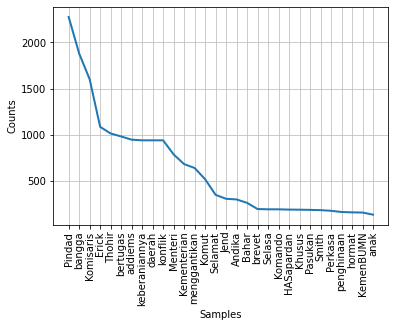

In [ ]:
fdist.plot(30)

In [ ]:
clean_text_formatted = nltk.Text(clean_text) # to view collocations list must be converted to nltk.Text

In [ ]:
type(clean_text_formatted)

nltk.text.Text

###Collocations
simillar to bigrams but find words that are more frequently used together rather than individually

In [ ]:
clean_text_formatted.collocations() 

daerah konflik; Erick Thohir; bertugas daerah; keberaniannya bertugas;
Komisaris Pindad; bangga keberaniannya; konflik bangga; addiems
bangga; bangga addiems; Pindad menggantikan; Menteri Erick; Pasukan
Khusus; Komut Pindad; Komando Pasukan; Kementerian Komisaris; Khusus
Selasa; brevet Komando; Thohir Komisaris; Andika Perkasa; Polri respon


### Lexical dispertion plot
Lexical dispersion plot(s) tells us where the word occurs on  given text. Words need to be specified.

In [ ]:
#clean_text_formatted.dispersion_plot(['Indonesia','pandemi','Vaksin','rakyat','UMKM'])

### Lexical Diversity
Lexical diversity shows us how often a word appears on a text. It shows us the range of vocab in a given text. 

In [ ]:
def lexical_diversity(text):
  return len(set(text)) / len(text)

In [ ]:
lexical_diversity(clean_text_formatted)

0.05313994159740718

###Word Cloud
Plots words. The sizes depend on their frequency. Frequently used words are bigger

In [ ]:
def wordcloud(cleaned_tokens):
  """Produces a word cloud from our list of tokenized words

  Parameters
  -----------
  cleaned_tokens : List of tokenized words that has stopwords removed.

  Returns
  ----------
  wordcloud : A vizualization of words that have their size corresponding to the word frequency

  """
  word_cloud_dict=Counter(cleaned_tokens) # get counter of each token
  wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_cloud_dict) # creates word cloud. Size of word correponds to frequency of token
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  plt.savefig('word_cloud.png', bbox_inches='tight')


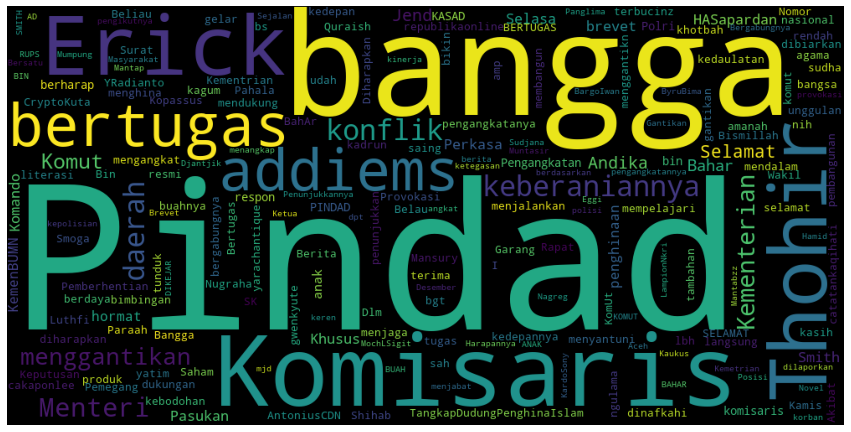

<Figure size 432x288 with 0 Axes>

In [ ]:
wordcloud(clean_text)

In [ ]:
min_threshold = 500

### Unigrams
Plots frequently used words as a bar graph

In [ ]:
def unigrams(cleaned_text,threshold=100):
  """Creates a bargraph based on frequency of individual tokens 

  Parameters
  -----------
  cleaned_tokens : List of tokenized words that has stopwords removed.

  Returns
  ----------
  Sorted plot of unigrams based on frequency
  """
  #unigrams = ngrams(cleaned_text,1)
  unigrams_count = Counter(cleaned_text) #gets frequency of tokens
  min_threshold = threshold #removes words below this threshold. Defaults to 100 
  bar = {x: count for x, count in unigrams_count.items() if count >= min_threshold} #removes words below this threshold
  word_bar = dict(sorted(bar.items(), key=lambda x: x[1],reverse=True))  #sorts the bar based on frequency
  plt.figure(figsize=(25,8))
  plt.bar(word_bar.keys(), word_bar.values())
  plt.xticks(rotation=45)
  plt.rc('xtick', labelsize=19)
  plt.title('Most unigrams', fontsize=40)



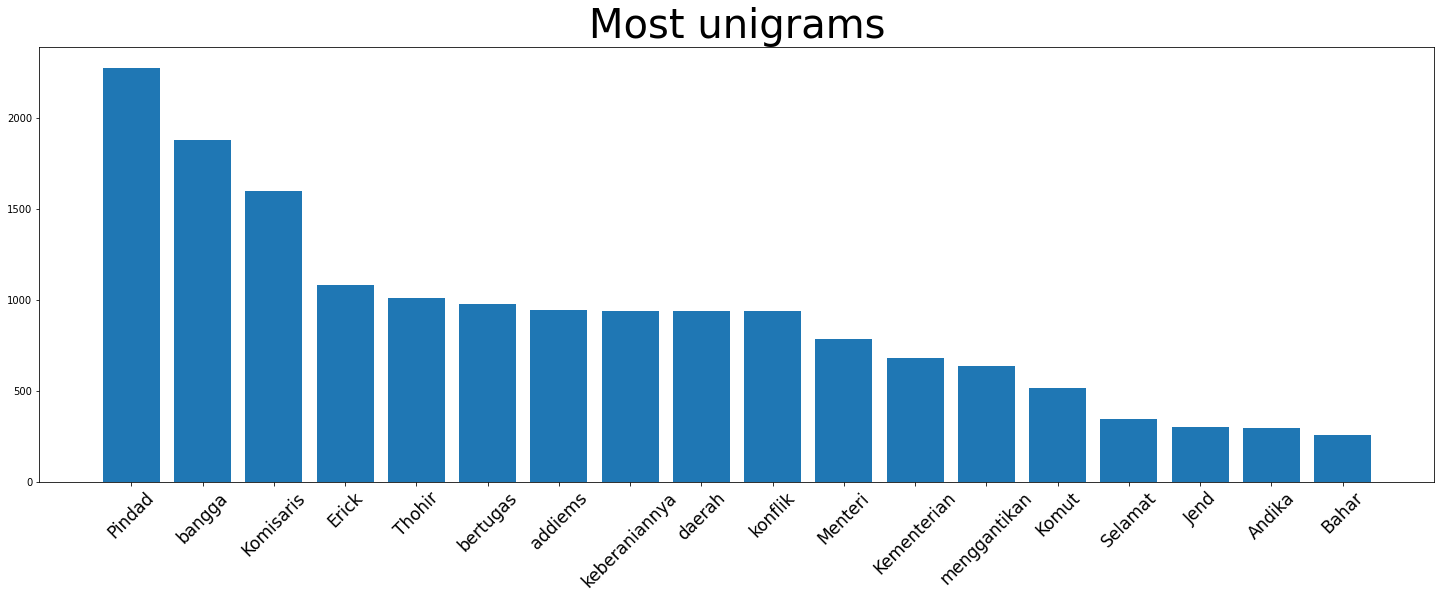

In [ ]:
unigrams(clean_text,200)

### Bigrams
PLots words frequently used together on a bar graph. Collocations is better

In [ ]:
def bigrams(cleaned_text,threshold=100):
  """Creates a bargraph based on frequency of two tokens occuring together

  Parameters
  -----------
  cleaned_tokens : List of tokenized words that has stopwords removed.
  threshold : excludes words below this threshold. 

  Returns
  ----------
  Sorted plot of bigrams based on frequency
  """
  bigrams = ngrams(cleaned_text,2) #select number of n grams
  bigrams_count = Counter(bigrams) # count number of 4
  bigram_threshold = threshold #remove below 4
  bigrams_count = {x: count for x, count in bigrams_count.items() if count >= bigram_threshold} # get count => 4
  bigrams_bar = dict(sorted(bigrams_count.items(), key=lambda x: x[1],reverse=True))    
  names = list(bigrams_bar.keys())   #make this sorted later
  actual_name = []

  for n in names:
    actual_name.append(n[0] + '_' +n[1]) #append two words together. Example red wine = red_wine

  values = list(bigrams_bar.values())
  plt.figure(figsize=(35,10))
  plt.bar(range(len(bigrams_bar)), values, tick_label=actual_name)
  plt.xticks(rotation=45)
  plt.rc('xtick', labelsize=19)
  plt.title('Most bigrams', fontsize=40)





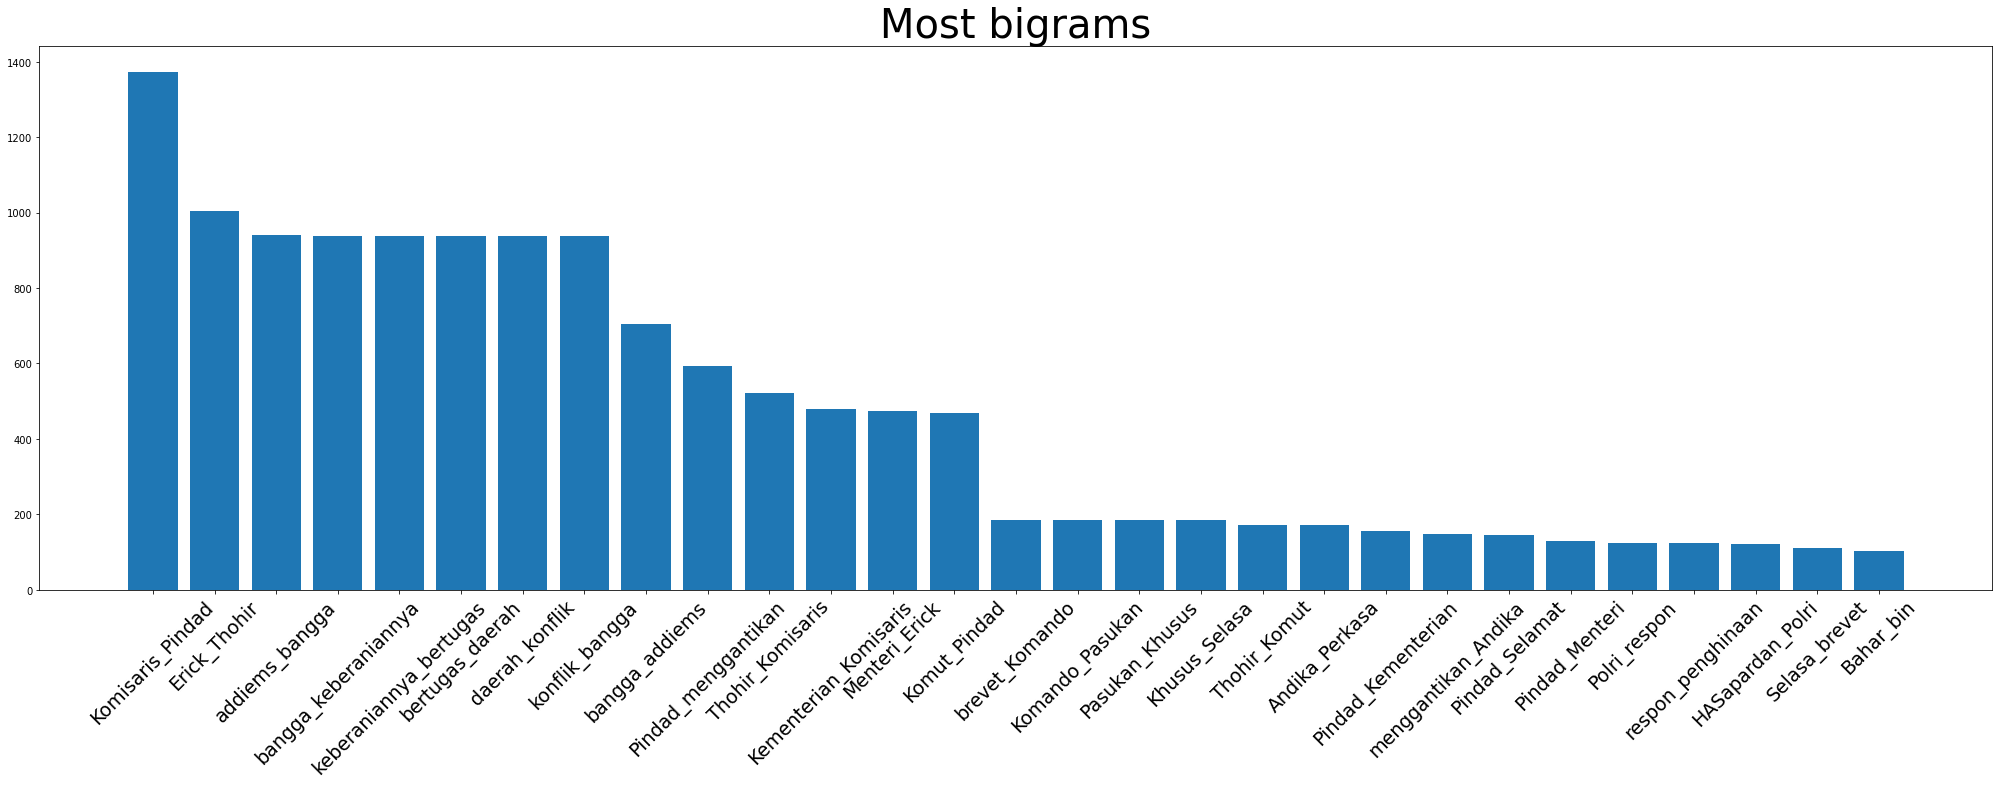

In [ ]:
bigrams(clean_text)

### Trigrams

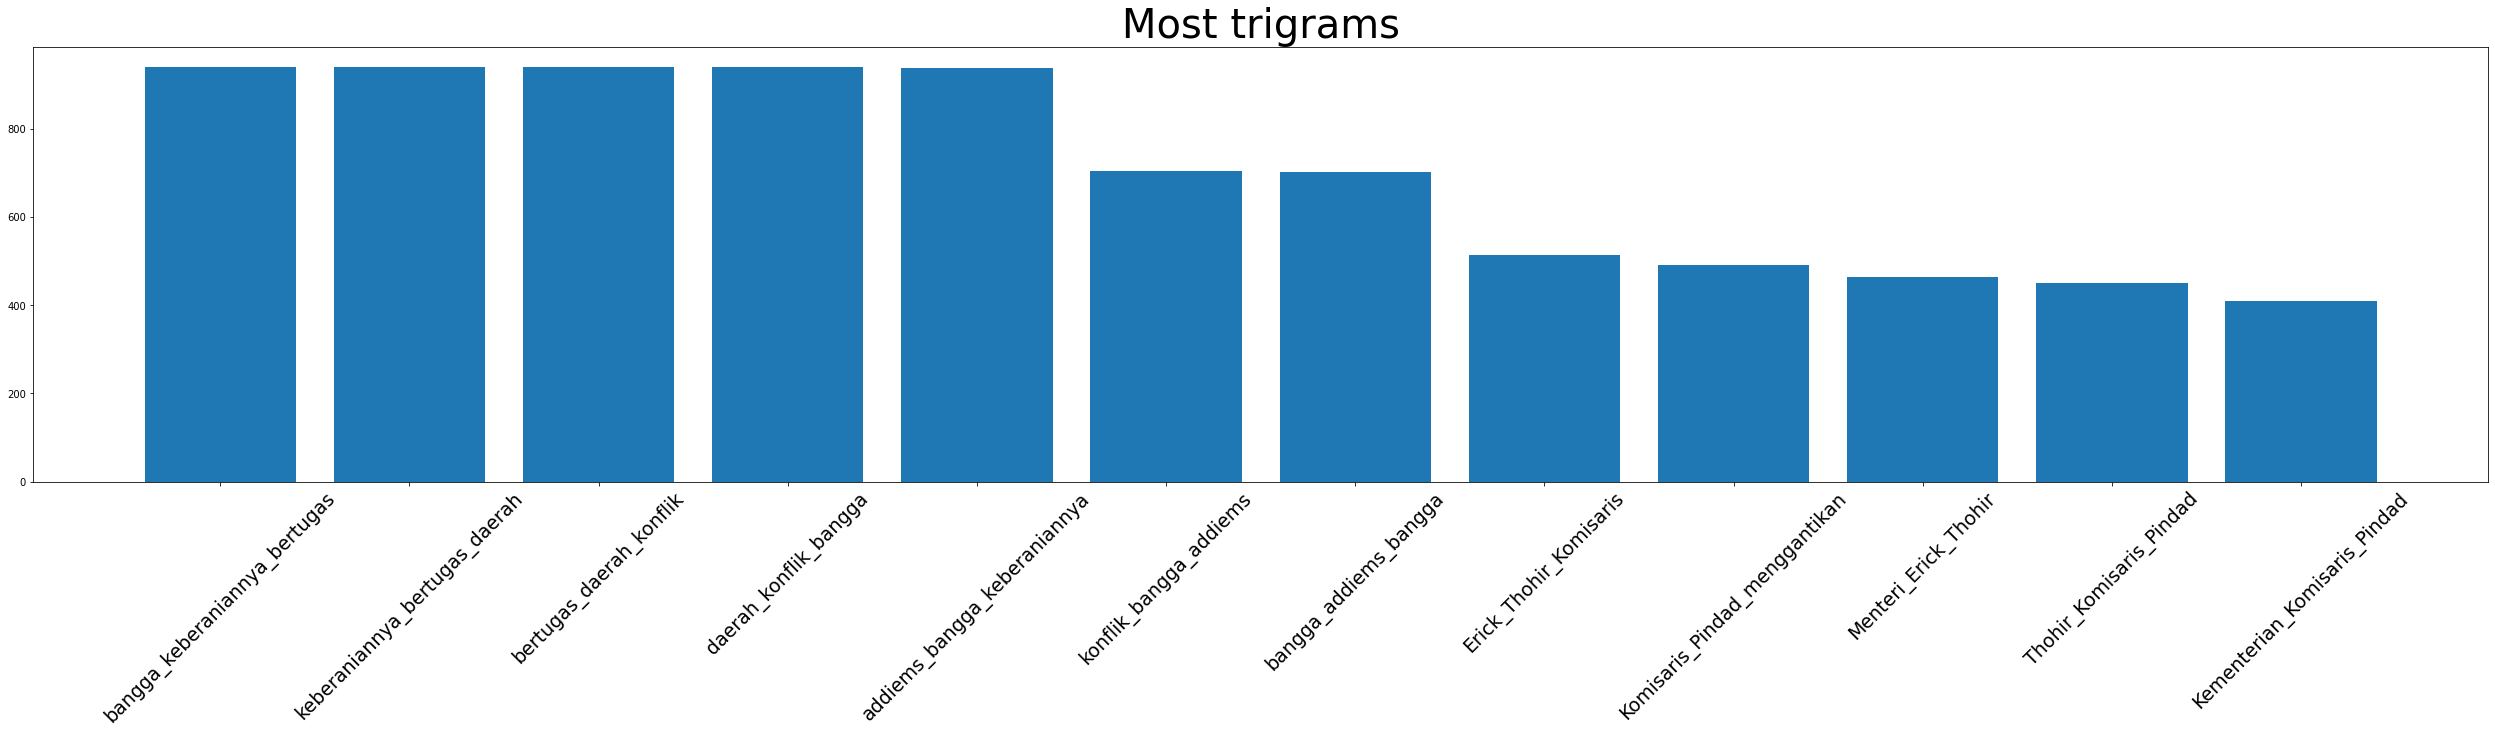

In [ ]:
def trigrams(cleaned_text,threshold=100):
  """Creates a bargraph based on frequency of three tokens occuring together

  Parameters
  -----------
  cleaned_tokens : List of tokenized words that has stopwords removed.

  Returns
  ----------
  Sorted plot of trigrams based on frequency
  """
  trigrams = ngrams(cleaned_text,3) #select number of n grams
  trigrams_count = Counter(trigrams) # count number of 
  trigrams_threshold = threshold  #move below 4
  trigrams_count = {x: count for x, count in trigrams_count.items() if count >= trigrams_threshold} # get count => 4
  trigrams_bar = dict(sorted(trigrams_count.items(), key=lambda x: x[1],reverse=True))    
  names = list(trigrams_bar.keys())   #make this sorted later
  actual_name = []

  for n in names:
    actual_name.append(n[0] + '_' +n[1] + '_' + n[2])   #append three words together. Example big red dog = big_red_dog

  values = list(trigrams_bar.values())
  plt.figure(figsize=(44,8))
  plt.bar(range(len(trigrams_bar)), values, tick_label=actual_name)
  plt.xticks(rotation=45)
  plt.rc('xtick', labelsize=19)
  plt.title('Most trigrams', fontsize=40)



trigrams(clean_text,300)#example


#### POS TAGGER

In [ ]:
#pos tagger, donwload model here 
#make func for thid
model_path = '/content/all_indo_man_tag_corpus_model.crf.tagger' 

def pos_tagger(cleaned_tokens,model_path):
  """Tags words based on their Part of Speech (POS)
  Please install package sklearn-pycrfsuite and import pycrfsuite before usage

  Parameters
  -----------
  cleaned_tokens : List of tokenized words that has stopwords removed.
  model_path : Path of model that has been trained to detect which POS a token belongs to


  Returns
  ----------
  result : Words tagged with the POS
  """
  
  ct = CRFTagger()
  ct.set_model_file(model_path)
  result = ct.tag(cleaned_tokens)
  return result



In [ ]:
test_tag = pos_tagger(clean_text,model_path)

In [ ]:
print(test_tag)

[('text', 'NN'), ('GARUT', 'NNP'), ('Keluarga', 'NNP'), ('Salsabila', 'NNP'), ('Handi', 'NNP'), ('Nagreg', 'NNP'), ('Kabupaten', 'NNP'), ('Bandung', 'NNP'), ('Garut', 'NNP'), ('dikunjungi', 'VB'), ('Senin', 'NNP'), ('rumah', 'NN'), ('korban', 'NN'), ('tabrakan', 'NN'), ('oknum', 'NN'), ('Nagreg', 'NNP'), ('Senin', 'NNP'), ('rumah', 'NN'), ('korban', 'NN'), ('tabrakan', 'NN'), ('oknum', 'NN'), ('Nagreg', 'NNP'), ('Senin', 'NNP'), ('Kasad', 'NNP'), ('mengunjungi', 'VB'), ('rumah', 'NN'), ('duka', 'VB'), ('ziarah', 'NN'), ('makam', 'NN'), ('korban', 'NN'), ('tabrak', 'NN'), ('lari', 'VB'), ('Nagreg', 'NNP'), ('Simak', 'NNP'), ('pernyataan', 'NN'), ('JenderalDudungAbdurachman', 'NNP'), ('mengunjungi', 'VB'), ('rumah', 'NN'), ('korban', 'NN'), ('tewas', 'VB'), ('akibat', 'NN'), ('tabrakan', 'NN'), ('Nagreg', 'NNP'), ('Kabupaten', 'NNP'), ('Bandung', 'NNP'), ('Jawa', 'NNP'), ('Barat', 'NNP'), ('Korban', 'NNP'), ('tewas', 'VB'), ('ditabrak', 'NN'), ('anggota', 'NN'), ('AD', 'NNP'), ('TempoNas

In [ ]:
def verb_counter(result, threshold=30):
  """Returns all verb in list of tokens and creates a bar graph based on their frequency

  Parameters
  -----------
  tagged_tokens : tokens that have been tagged according to their POS
  threshold : excludes words below this threshold. 

  Returns
  ----------
  result : Words tagged with the POS
  """
  verbs = []
  for w in result:
    if 'VB' in w:
      verbs.append(w[0])
  verb_threshold = threshold
  verb_counter = Counter(verbs)
  verb_count = {x: count for x, count in verb_counter.items() if count >= verb_threshold} # remove verb below threshold
  verb_bar = dict(sorted(verb_count.items(), key=lambda x: x[1],reverse=True))
  names = list(verb_bar.keys())  
  values = list(verb_bar.values())
  plt.figure(figsize=(40,8))
  plt.bar(range(len(verb_bar)), values, tick_label=names)
  plt.rc('xtick', labelsize=30)
  plt.xticks(rotation=45)


  plt.title('Most common verbs', fontsize=40)




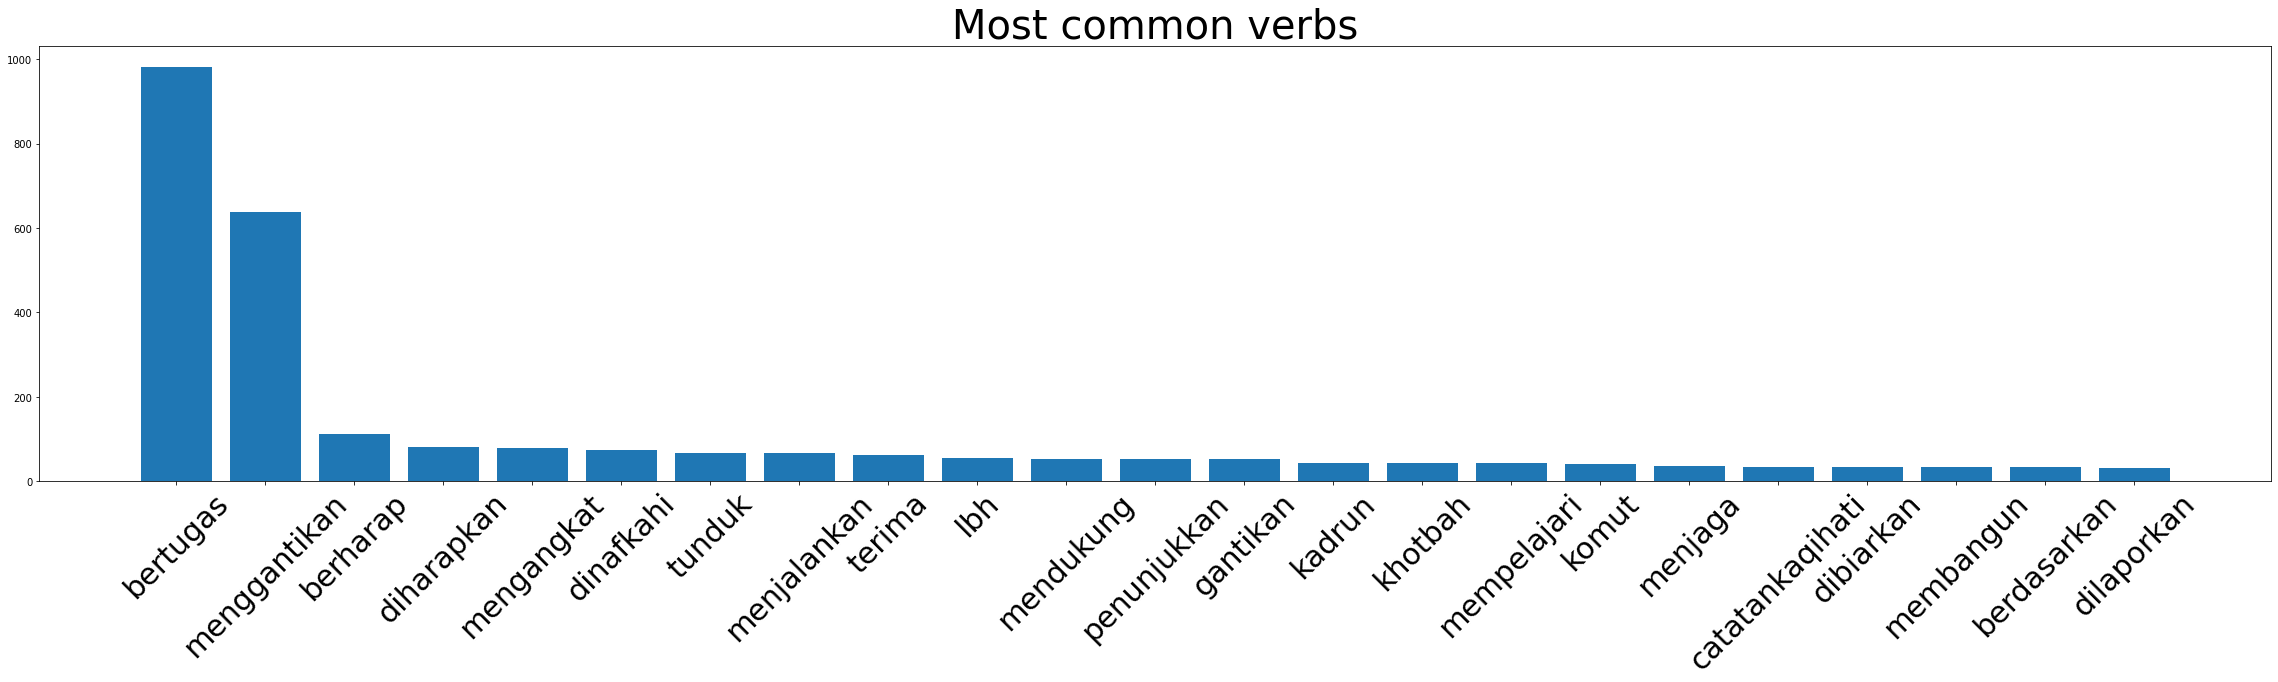

In [ ]:
verb_counter(test_tag)

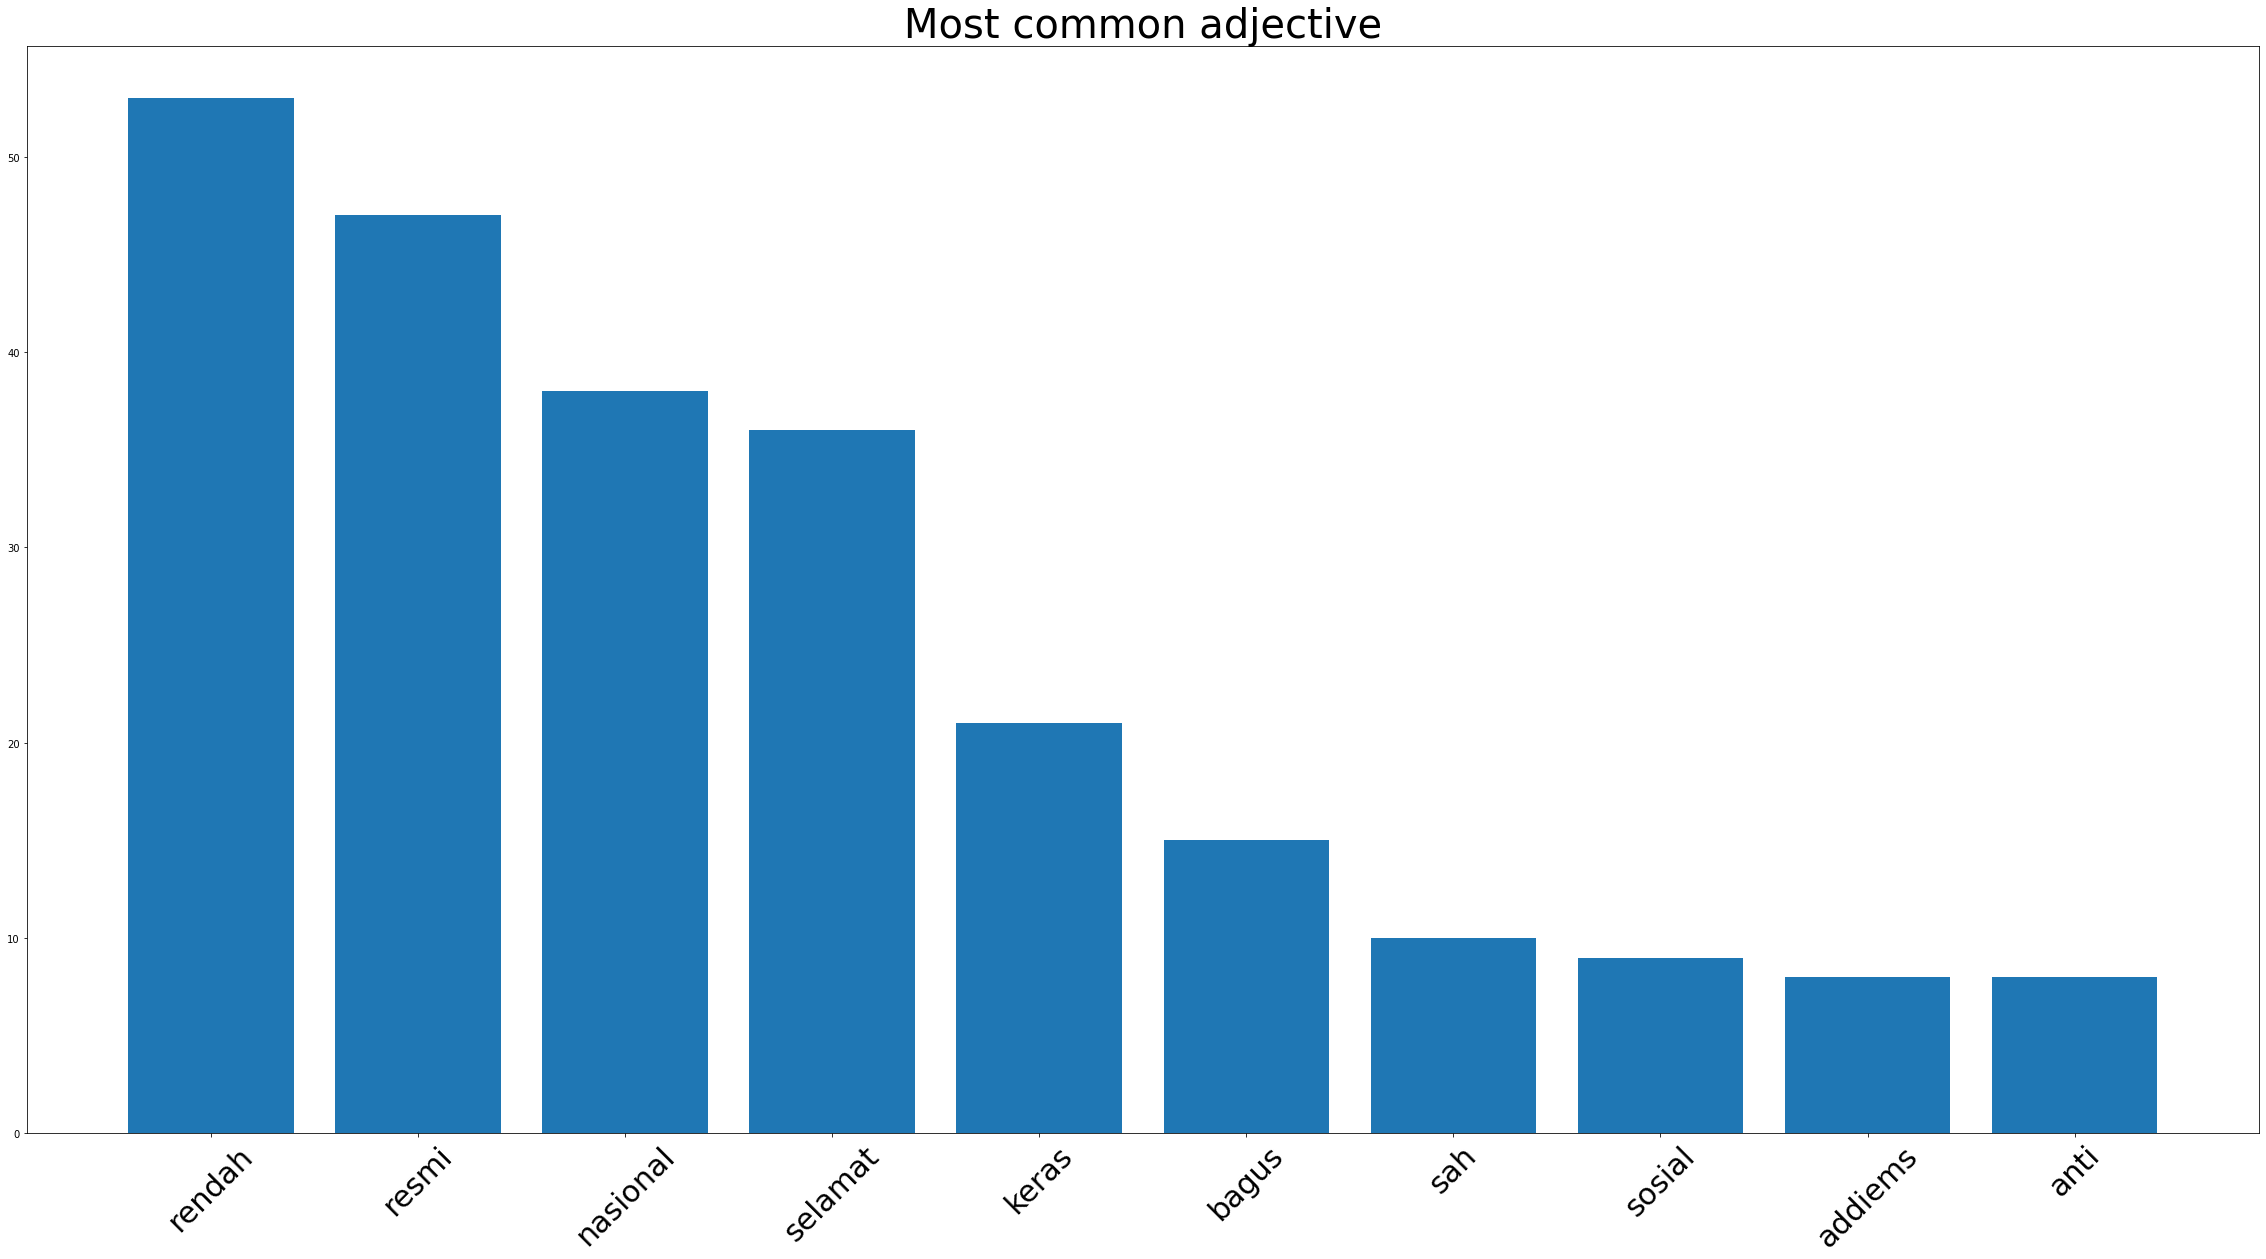

In [ ]:
def adjective_counter(tagged_tokens,threshold=5):
  """Returns all adjectives in list of tokens and creates a bar graph based on their frequency

  Parameters
  -----------
  tagged_tokens : tokens that have been tagged according to their POS
  threshold : excludes words below this threshold. 

  Returns
  ----------
  result : Words tagged with the POS
  """
  adj = []
  for a in tagged_tokens:
    if 'JJ' in a:
      adj.append(a[0])

  adj_threshold = threshold
  adj_counter = Counter(adj)
  adj_count = {x: count for x, count in adj_counter.items() if count >= adj_threshold} # remove verb below threshold
  adj_bar = dict(sorted(adj_count.items(), key=lambda x: x[1],reverse=True))
  names = list(adj_bar.keys())  
  values = list(adj_bar.values())
  plt.figure(figsize=(40,20))
  plt.bar(range(len(adj_bar)), values, tick_label=names)
  plt.title('Most common adjective', fontsize= 40)
  plt.rc('xtick', labelsize=30)
  plt.xticks(rotation=45)


tagged_tokens = test_tag

adjective_counter(tagged_tokens)# example usage 


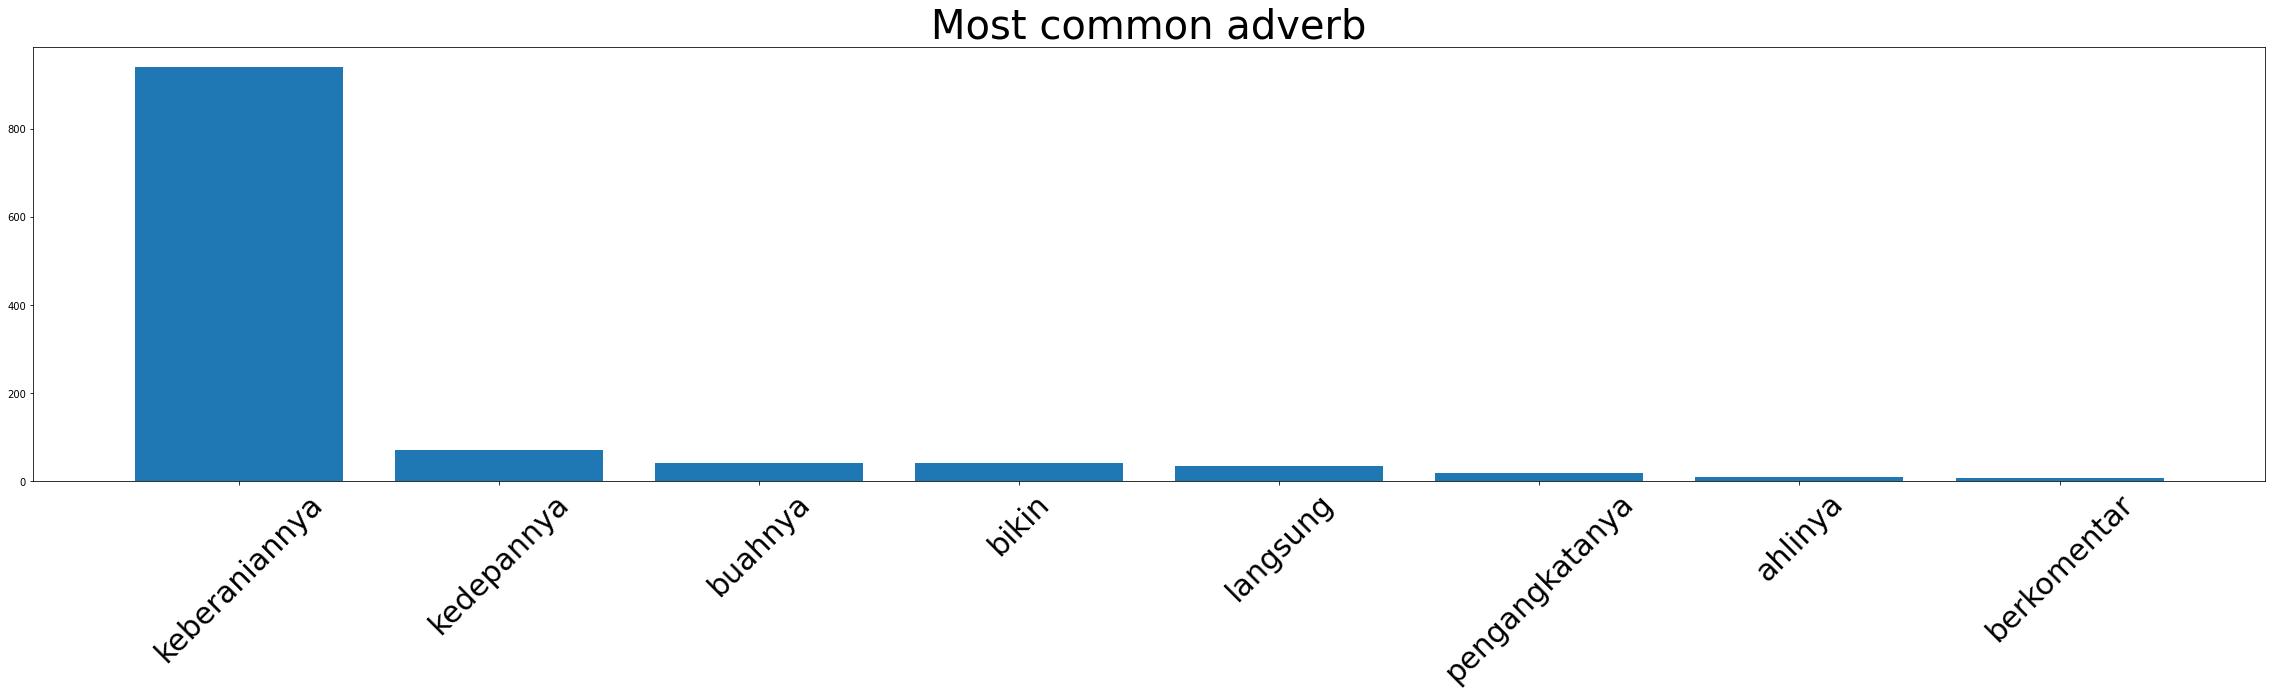

In [ ]:
def adverb_counter(result,threshold=5):
  """Returns all adverb in list of tokens and creates a bar graph based on their frequency

  Parameters
  -----------
  tagged_tokens : tokens that have been tagged according to their POS
  threshold : excludes words below this threshold. 

  Returns
  ----------
  result : Words tagged with the POS
  """
  
  adv = []
  for av in result:
    if 'RB' in av:
      adv.append(av[0])

  adv_threshold = threshold
  adv_counter = Counter(adv)
  adv_count = {x: count for x, count in adv_counter.items() if count >= adv_threshold} # remove verb below threshold
  adv_bar = dict(sorted(adv_count.items(), key=lambda x: x[1],reverse=True))
  names = list(adv_bar.keys())  
  values = list(adv_bar.values())
  plt.figure(figsize=(40,8))
  plt.bar(range(len(adv_bar)), values, tick_label=names)
  plt.title('Most common adverb', fontsize= 40)
  plt.rc('xtick', labelsize=30)
  plt.xticks(rotation=45)

adverb_counter(tagged_tokens)#example usage 

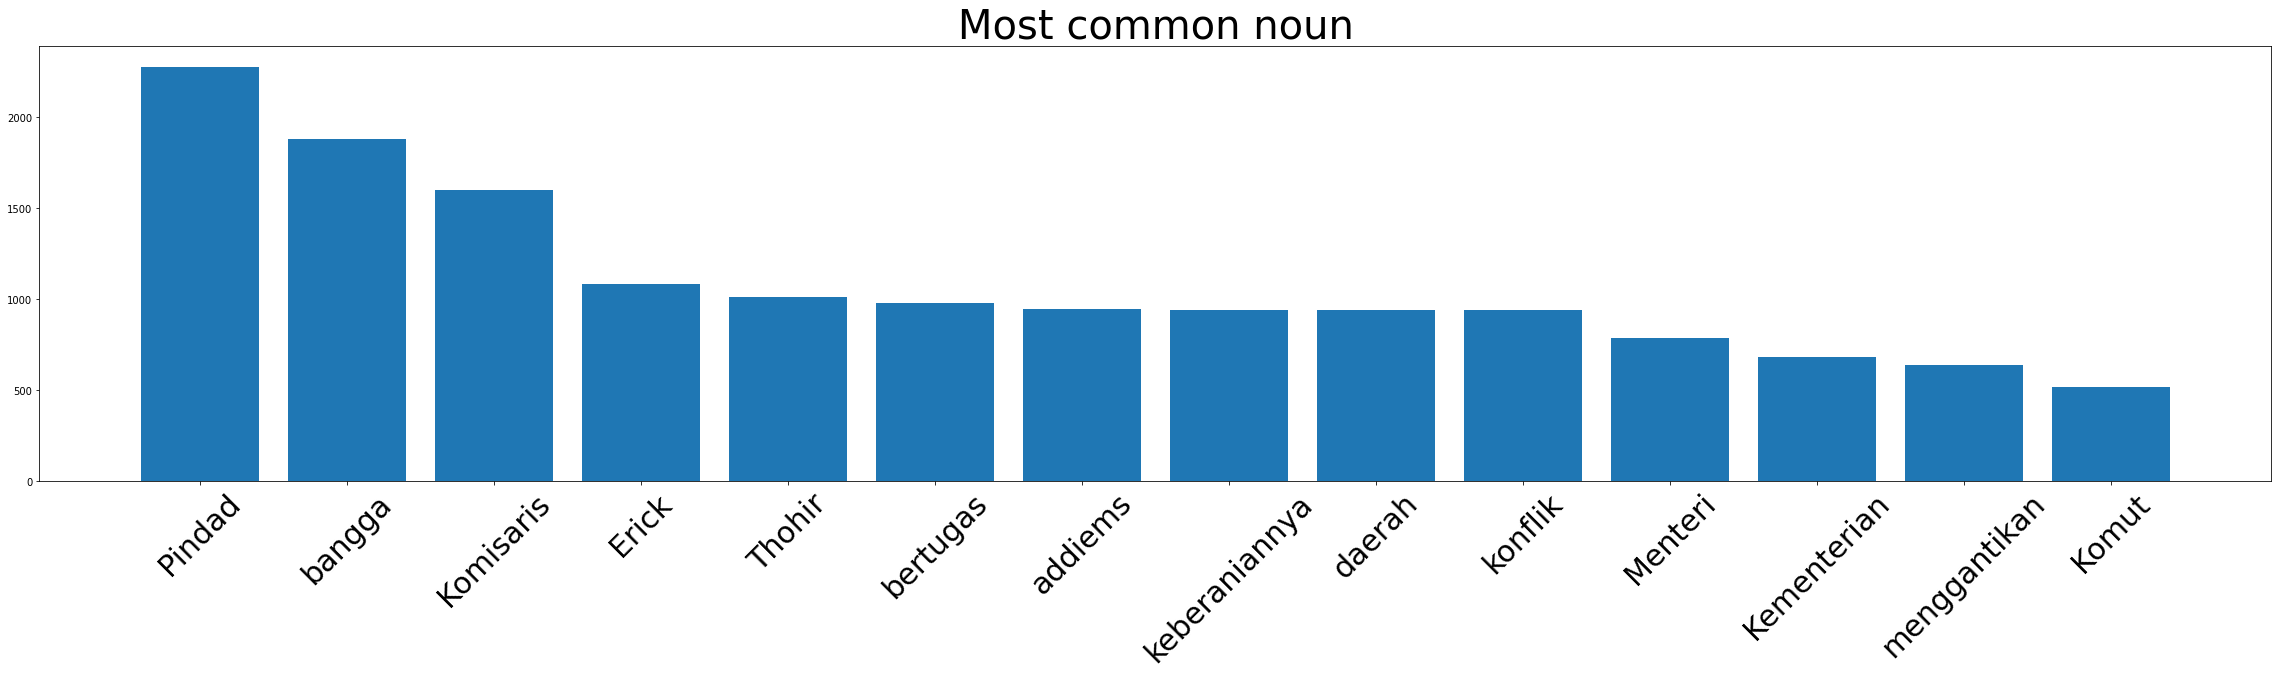

In [ ]:
#NN and NNP
def noun_counter(result,threshold=100):
  """Returns all nouns in list of tokens and creates a bar graph based on their frequency

    Parameters
    -----------
    tagged_tokens : tokens that have been tagged according to their POS
    threshold : excludes words below this threshold. 

    Returns
    ----------
    result : Words tagged with the POS
    """
  noun = []
  for n in result:
    if 'NN' or 'NNP' in n:
      noun.append(n[0])

  noun_threshold = threshold #increase threshold
  noun_counter = Counter(noun)
  noun_count = {x: count for x, count in noun_counter.items() if count >= noun_threshold} # remove verb below threshold
  noun_bar = dict(sorted(noun_count.items(), key=lambda x: x[1],reverse=True))
  names = list( noun_bar.keys())  
  values = list(noun_bar.values())
  plt.figure(figsize=(40,8))
  plt.bar(range(len(noun_bar)), values, tick_label=names)
  plt.title('Most common noun', fontsize= 40)
  plt.rc('xtick', labelsize=30)
  plt.xticks(rotation=45)


noun_counter(tagged_tokens,500) #example usage 

#### Example usage 
make a package btw

In [ ]:
#use here. make our own package
path = ""
text = openandtoken(path)
clean_text = stopwords_cleaner(text)
fdist = FreqDist(clean_text)


In [ ]:
#fdist plot
fdist.plot(30)

In [ ]:
#collocations
clean_text_formatted = nltk.Text(clean_text) 
clean_text_formatted.collocations()

In [ ]:
#lexical diversity
lexical_diversity(clean_text_formatted)

In [ ]:
#wordcloud
wordcloud()

In [ ]:
#unigrams
unigrams()

In [ ]:
#bigrams
bigrams()

In [ ]:
#trigrams()
trigrams()

In [ ]:
#verbcounter
verb_counter()

In [ ]:
#adj counter
adjective_counter()

In [ ]:
#adverb counter
adverb_counter()

In [ ]:
#noun counter
noun_counter()